## Machine Learning Pipeline using Scikit-Learn

In this project we will explore our BigMart Sales dataset and develop a Machine Learning pipeline to forecast the sales of product in the stores

### Step 1: Data Importing, Exploration and Preprocessing

Here we import the required libraries and check for NULL values present in the dataset

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#importing the train data
train_df = pd.read_csv("train_data.csv")

#now checking for NULL values
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [2]:
#replacing the missing data by mean in Item_Weight column
train_df.Item_Weight.fillna(train_df.Item_Weight.mean(), inplace = True)

#replacing the missing data by mode in Outlet_Size column
train_df.Outlet_Size.fillna(train_df.Outlet_Size.mode()[0], inplace = True)

In [3]:
#checking for NULL values again
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [4]:
#displaying the top 10 rows from the dataset
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [5]:
#displaying the bottom 10 rows from the dataset
train_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Medium,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


### Step 2: Encoding the Categorical Values

In [6]:
#importing the required library
import category_encoders as ce

#creating an object of One Hot Encoder
one = ce.OneHotEncoder(cols = ['Item_Fat_Content',
                               'Item_Type',
                               'Outlet_Identifier',
                               'Outlet_Size',
                               'Outlet_Location_Type',
                               'Outlet_Type'], use_cat_names = True)

#encoding the categorical values
train_df = one.fit_transform(train_df)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### Step 3: Scaling the Data

In [7]:
#importing the required library
from sklearn.preprocessing import StandardScaler

#creating an object of StandardScaler
scaler = StandardScaler()

#fitting with Item_MRP
scaler.fit(np.array(train_df.Item_MRP).reshape(-1, 1))

#transforming the data
train_df.Item_MRP = scaler.transform(np.array(train_df.Item_MRP).reshape(-1, 1))

### Step 4: Building the Model

In [8]:
#importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
#seperating the independent and target variables
train_X = train_df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])
train_Y = train_df['Item_Outlet_Sales']

#now split the data randomly
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size = 0.25, random_state = 0)

#now display the shape of train and test data
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [10]:
#creating an object of linear regression model
model_LR = LinearRegression()

#fitting the model with train data
model_LR.fit(train_x, train_y)

#predicting the trarget on train and test datasets
predict_train = model_LR.predict(train_x)
predict_test = model_LR.predict(test_x)

#Root Mean Squared Error on train and test datasets
print("RMSE on train dataset : ", mean_squared_error(train_y, predict_train)**(0.5))
print("RMSE on test  dataset : ", mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train dataset :  1120.4052781649057
RMSE on test  dataset :  1148.7174102949964


In [11]:
#creating an object for Random Forest Regressor
model_RFR = RandomForestRegressor(max_depth = 10)

#fitting the model with traning data
model_RFR.fit(train_x, train_y)

#predicting the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

#finding the Root Mean Squared Error on train and test datasets
print("RMSE on train dataset : ", mean_squared_error(train_y, predict_train) ** (0.5))
print("RMSE on test  dataset : ", mean_squared_error(test_y, predict_test) ** (0.5))

RMSE on train dataset :  895.8676081796159
RMSE on test  dataset :  1118.0799627783756


### Step 5: Feature Importance

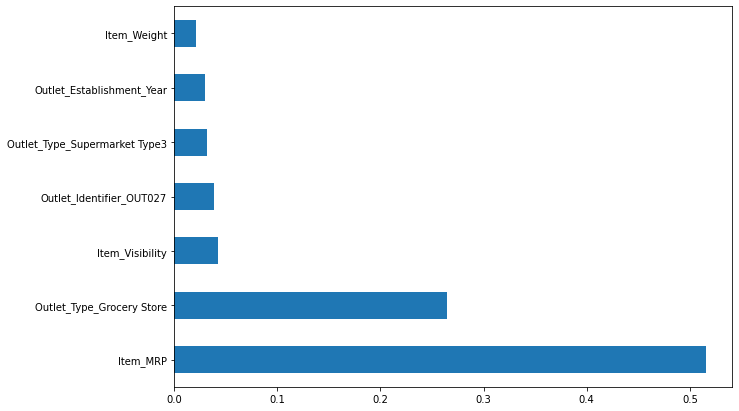

In [12]:
#plotting the 7 most important features of the dataset
plt.figure(figsize = (10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind = 'barh');

In [ ]:
#now we train the RandomForest Model using these features
